# Motivation for brown bag
- Exchange API 웹 요청을 편하게 하는 것을 보고 David이 관심을 보임


# Intro
- 프로그래밍은 누구나 할 수 있다
- 당신이 프로그래머라면 1시간 안에 파이썬 문법을 익힐 수 있다
- 프로그래밍 경험이 전혀 없어도 5일이면 간단한 프로그램을 작성할 수 있다
- 당신이 해커라면? 해킹에 필요한 툴을 직접 만들 수 있다
- 당신이 개발자라면? 빠르게 prototype을 작성해 볼 수 있다
- 당신이 데이터 분석가라면? 데이터 시각화 및 통계를 쉽게 할 수 있다

# Why did I start python?
- 100여개의 시스템의 패스워드를 일일이 바꾸기 힘든데 한번에 할 수 없을까?

# Udacity
Udacity was born out of a Stanford University experiment in which Sebastian Thrun and Peter Norvig offered their "Introduction to Artificial Intelligence" course online to anyone, for free.  
I studied at Udacity(https://www.udacity.com/).  
I thank Dave Evans who is Instructors Intro to Computer Science and Sebastian Thrun who is one of the creater of udacity.  
The mission of udacity is to bring accessible, affordable, engaging, and highly effective higher education to the world. **They and I believe that higher education is a basic human right**, and we seek to empower our students to advance their education and careers. 


# What I did
- 선거철마다 종북 몰이가 등장하는것 같은데 과거에는 어땟을까?(mechanize, beatiful soup, mongodb)
- nmap보다 빠른 portscanner를 만들 수 없을까?(multi process, thread)
- IBM Appscan이상의 Web vulnerability scanner를 만들 수 없을까?(requests)
- 어떻게 하면 PC에서 패스워드가 포함된 파일만 가져올 수 있을까?(regular expression)
- **컴퓨터는 어떻게 얼굴을 인식할까?(Demo, opencv)**
- **에버노트의 영수증을 인식하는 기능은 어떻게 작동할까?(Demo, opencv, scikit-image)**
- 메신저 대화방 parser 만들기(kakaotalk, line, whatsapp)
- 뉴욕타임즈에 article을 바탕으로 컴퓨터는 작가가 누구인지 추측할 수 있을까?(scikit-learn, nltk)
- Captcha문자를 컴퓨터가 인식할 수 없을까?(pandas, lasagne, theano, keras, scikit-neuralnetwork)

# Demo 에버노트의 영수증을 인식하는 기능은 어떻게 작동할까?

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
from imutils.convenience import resize
from imutils.perspective import four_point_transform
from skimage.filters import threshold_adaptive
import cv2
import numpy as np

STEP 1: Edge Detection


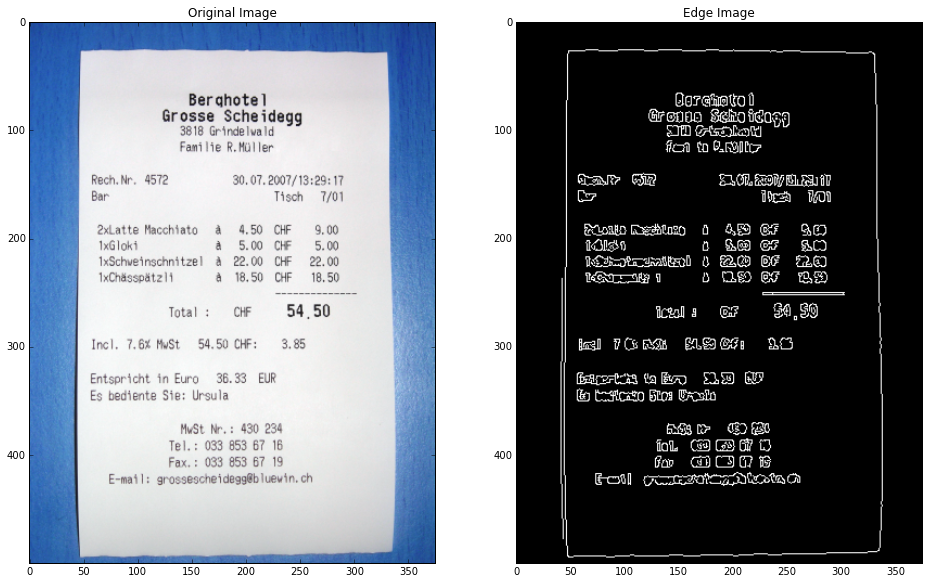

In [2]:
# Step 1: Edge Detection

# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread("./data/ReceiptSwiss.jpg")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = resize(image, height = 500)
 
# convert the image to grayscale, blur it, and find edges in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

# show the original image and the edge detected image
print "STEP 1: Edge Detection"
plt.figure(figsize=(16,12))
plt.subplot(121), plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(edged, cmap = 'gray')
plt.title('Edge Image')

STEP 2: Find contours of paper


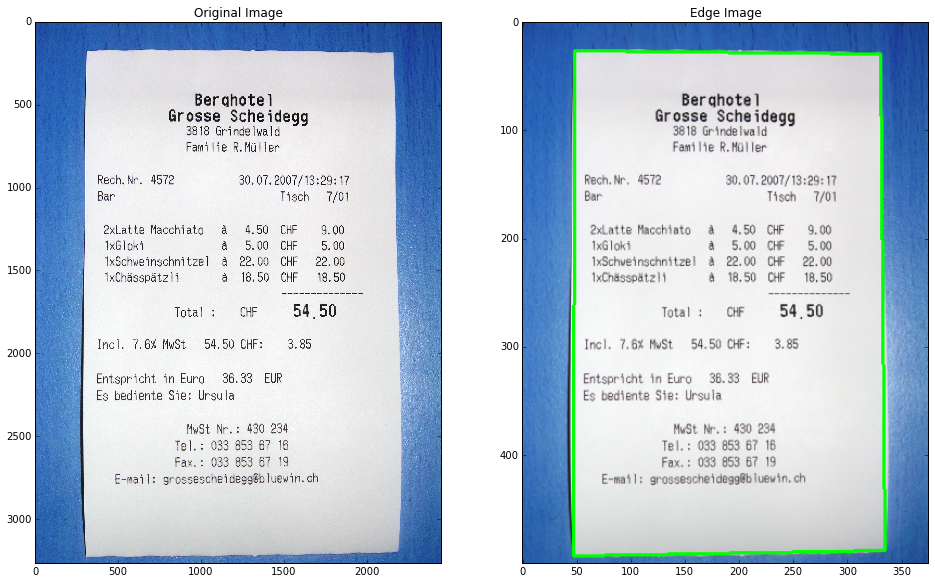

In [4]:
# Step 2: Use the edges in the image to find the contour (outline) representing the piece of paper being scanned.

# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour

(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
# loop over the contours
for c in cnts:

	peri = cv2.arcLength(c, True) # arcLength 곡선의 길이를 계산
    
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	if len(approx) == 4:
		screenCnt = approx
		break
 
# show the contour (outline) of the piece of paper
print "STEP 2: Find contours of paper"
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.figure(figsize=(16,12))
plt.subplot(121), plt.imshow(orig, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(image, cmap = 'gray')
plt.title('Edge Image')

STEP 3: Apply perspective transform


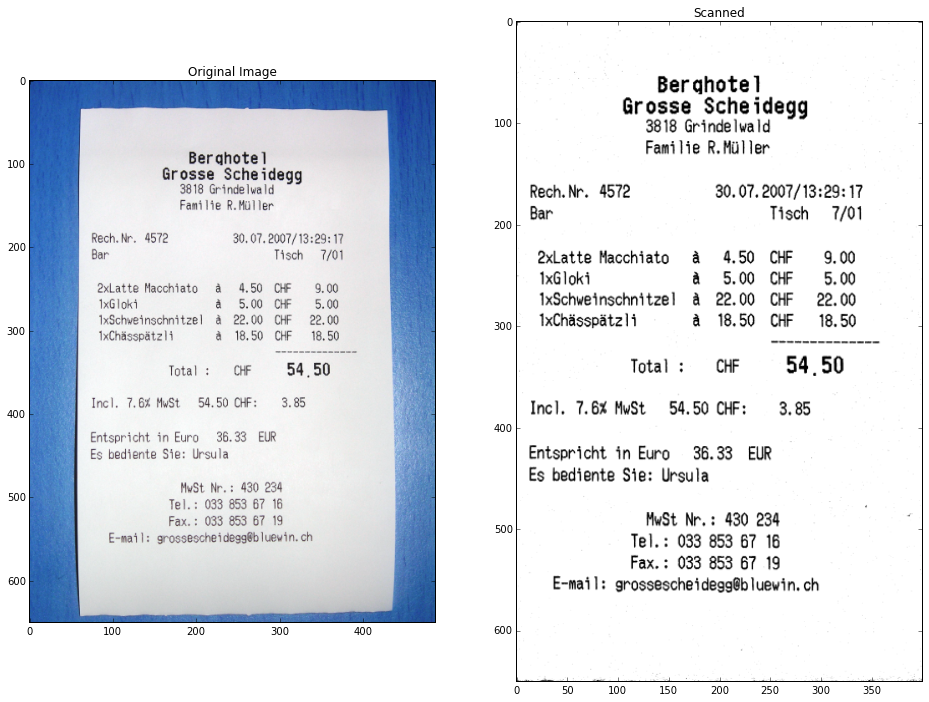

In [5]:
# Step 3: Apply a perspective transform to obtain the top-down view of the document.
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
 
# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
warped = threshold_adaptive(warped, 250, offset = 10)
warped = warped.astype("uint8") * 255
 
# show the original and scanned images
print "STEP 3: Apply perspective transform"
plt.figure(figsize=(16,12))
plt.subplot(121), plt.imshow(resize(orig, height = 650), cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(resize(warped, height = 650), cmap = 'gray')
plt.title('Scanned')

# Demo Face Detection in Python Using a Webcam

In [6]:
import cv2

faceCascade = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

# Python syntax for non developer
## variables

In [9]:
# A string represents an ordered series of characters
my_string = "a line of text"
my_string = 'a line of text'

print my_string
print type(my_string)
print len(my_string)

a line of text
<type 'str'>
14


In [26]:
print my_string.find("text")

10


In [7]:
# Assign values to the three variable types
# Here, we simply assign a literal
my_int = 5
print my_int
print type(my_int)

my_float = 5.0
print my_float
print type(my_float)

my_boolean = False
print my_boolean
print type(my_boolean)

5
<type 'int'>
5.0
<type 'float'>
False
<type 'bool'>


In [30]:
print my_int + 6
print my_float + 6

11
11.0


# Statements and program flow

In [ ]:
a = 1
b = 2

if True:
    print a  

if False:
    print b

In [37]:
a = 1
b = 2
c = 3

if a > 0:
    print a
    
elif b == 2: 
    print b  
    
elif c <= 3:  
    print c 
    
else:      
    print nan # where?

if b >= 0:    
    print b   

1
2


## Tuple

In [45]:
my_tuple = (1, 2.0, False, False, "jack", "jack", "jack")

print my_tuple
print type(my_tuple)
print len(my_tuple)

(1, 2.0, False, False, 'jack', 'jack', 'jack')
<type 'tuple'>
7


In [47]:
my_tuple.count(False)

2

## Tuple

In [49]:
my_list = [True, "a string!", (1,'tuple','in', 1, 'list')] 

print my_list
print type(my_list)
print len(my_list)

[True, 'a string!', (1, 'tuple', 'in', 1, 'list')]
<type 'list'>
3


In [54]:
print my_list[0]
my_list[0] = "jack"
print my_list[0]
print my_list

jack
jack
['jack', 'a string!', (1, 'tuple', 'in', 1, 'list')]


## Dictionary

In [53]:
my_dictionary = {1:[1,1,1], 3:'three', False:2.0}
print my_dictionary

my_dictionary = {False:2.0, 1:[1,1,1], 3:'three'}
print my_dictionary

print type(my_dictionary)
print len(my_dictionary)

{False: 2.0, 1: [1, 1, 1], 3: 'three'}
{False: 2.0, 1: [1, 1, 1], 3: 'three'}
<type 'dict'>
3


In [58]:
for key in my_dictionary:
    print "key : %s,     value : %s" %(key, my_dictionary[key])

key : False,     value : 2.0
key : 1,     value : [1, 1, 1]
key : 3,     value : three


# Functions

In [60]:
def print_something():
    print "just printing"

print_something()

just printing


In [63]:
# Function definition
def print_and_sum(a, b):
    print 'The first number is', a
    print 'The second number is', b
    return a + b

# Assign function output to a variable
c = print_and_sum(3,5)
print 'Their sum is', c
print 
# Print function output directly
print print_and_sum(10,20)

The first number is 3
The second number is 5
Their sum is 8

The first number is 10
The second number is 20
30


### 더 현실적인 문제를 풀어보자

- 고객이 빌린 BTC : 1
- 수수료는 0.2%
- 고객에게 1.002BTC(1 + 0.002)를 받으면 되지만 1.002BTC를 KRW->BTC로 거래하는 도중
- 0.002004(=1.002 * 0.002)의 수수료가 발생  
** 원래 수수료 보다 0.000004만큼의 차액이 발생(1BTC 300,000원 기준)**
- **고객이 빌린돈이 늘어나면 날수록 얼마나 수수료의 차이가 생길까?**

In [74]:
def fee_diff(btc):
    
    # x = 1, 고객이 빌린돈
    # fee_a = 1 * 0.002 = 0.002
    fee_a = btc * 0.002
    # sum_a = 1 + 0.002
    sum_a = btc + fee_a
    
    # fee_b = 1.002 * 0.002
    fee_b = sum_a * 0.002
    # sum_b = 1.002 + (1.002 * 0.002)
    sum_b = sum_a + fee_b
    
    return fee_b - fee_a

In [77]:
# 1BTC를 고객이 빌린 경우
btc = 1
print "고객이 1BTC를 빌린 경우 수수료 차이 %.9f" %fee_diff(btc)

# 11BTC를 고객이 빌린 경우
btc = 11
print "고객이 1BTC를 빌린 경우 수수료 차이 %.9f" %fee_diff(btc)

고객이 1BTC를 빌린 경우 수수료 차이 0.000004000
고객이 1BTC를 빌린 경우 수수료 차이 0.000044000


## 조금 더 시각적으로 직관적으로 알 수 없을까?

In [80]:
import numpy as np

In [82]:
np.arange(1, 10, 0.1)

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9])

In [90]:
btc = np.arange(1, 1000, 0.01)

In [85]:
len(btc)

99900

In [86]:
import pandas as pd

In [92]:
df = pd.DataFrame(btc)
df.columns = ['btc']

In [94]:
df.describe()

btc
count  99900.000000
mean     500.495000
std      288.387903
min        1.000000
25%      250.747500
50%      500.495000
75%      750.242500
max      999.990000

In [106]:
np.set_printoptions(precision=9)
pd.set_option('precision', 9)

In [109]:
df['btc'][:10].map(lambda x: fee_diff(x))

0    0.00000400
1    0.00000404
2    0.00000408
3    0.00000412
4    0.00000416
5    0.00000420
6    0.00000424
7    0.00000428
8    0.00000432
9    0.00000436
Name: btc, dtype: float64

In [110]:
df['fee_diff'] = df['btc'].map(lambda x: fee_diff(x))

In [112]:
df.head(5)

btc    fee_diff
0  1.00  0.00000400
1  1.01  0.00000404
2  1.02  0.00000408
3  1.03  0.00000412
4  1.04  0.00000416

In [114]:
df.describe()

btc        fee_diff
count  99900.00000000  99900.00000000
mean     500.49500000      0.00200198
std      288.38790283      0.00115355
min        1.00000000      0.00000400
25%      250.74750000      0.00100299
50%      500.49500000      0.00200198
75%      750.24250000      0.00300097
max      999.99000000      0.00399996

In [115]:
df['fee_diff_krw'] = df['fee_diff'].map(lambda x: x * 300000)

In [117]:
df.head(5)

btc    fee_diff  fee_diff_krw
0  1.00  0.00000400         1.200
1  1.01  0.00000404         1.212
2  1.02  0.00000408         1.224
3  1.03  0.00000412         1.236
4  1.04  0.00000416         1.248

In [116]:
df.describe()

btc        fee_diff   fee_diff_krw
count  99900.00000000  99900.00000000  99900.0000000
mean     500.49500000      0.00200198    600.5940000
std      288.38790283      0.00115355    346.0654834
min        1.00000000      0.00000400      1.2000000
25%      250.74750000      0.00100299    300.8970000
50%      500.49500000      0.00200198    600.5940000
75%      750.24250000      0.00300097    900.2910000
max      999.99000000      0.00399996   1199.9880000

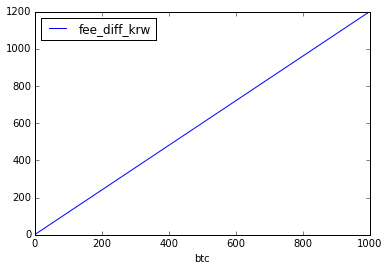

In [120]:
df.plot(x='btc', y='fee_diff_krw')

# Get familar with Korbit API using Python

In [121]:
import requests
from bs4 import BeautifulSoup

## public api
### 거래소의 현재 가격정보 가져오기

In [122]:
url = "https://api.korbit.co.kr/v1/external/exchanges/ticker/"

payload = {"client_id" : "IIqo8jjBcK6UplyL2fhVS7kqQYknTyr4fFr2qkyGNicPvKgTP0vnERZSRLptv",
          "exchanges" : "btcchina"}

response = requests.get(url, params=payload)
print response.content

{"status":"success","data":[{"exchange":"BTCChina","counter":"CNY","currencyPair":"BTC/CNY","time":1446081266000,"volume":"58553.86","high":[{"currency":"KRW","value":"358935.37"},{"currency":"CNY","value":"1998.60"}],"low":[{"currency":"KRW","value":"347809.56"},{"currency":"CNY","value":"1936.65"}],"last":[{"currency":"KRW","value":"358040.99"},{"currency":"CNY","value":"1993.62"}],"bid":[{"currency":"KRW","value":"357760.83"},{"currency":"CNY","value":"1992.06"}],"ask":[{"currency":"KRW","value":"358039.20"},{"currency":"CNY","value":"1993.61"}]}]}


In [123]:
content = response.json()

In [124]:
import json

In [125]:
print json.dumps(content, indent=4, sort_keys=True)

{
    "data": [
        {
            "ask": [
                {
                    "currency": "KRW", 
                    "value": "358039.20"
                }, 
                {
                    "currency": "CNY", 
                    "value": "1993.61"
                }
            ], 
            "bid": [
                {
                    "currency": "KRW", 
                    "value": "357760.83"
                }, 
                {
                    "currency": "CNY", 
                    "value": "1992.06"
                }
            ], 
            "counter": "CNY", 
            "currencyPair": "BTC/CNY", 
            "exchange": "BTCChina", 
            "high": [
                {
                    "currency": "KRW", 
                    "value": "358935.37"
                }, 
                {
                    "currency": "CNY", 
                    "value": "1998.60"
                }
            ], 
            "last": [
                {
            

### orderbook정보 가져오기

In [126]:
url = "https://api.korbit.co.kr/v1/orderbook"

payload = {"category" : "all",}

response = requests.get(url, params=payload)

print json.dumps(response.json(), indent=4, sort_keys=True)

{
    "asks": [
        [
            "362400", 
            "4.62148187", 
            "1"
        ], 
        [
            "362500", 
            "2.24723252", 
            "3"
        ], 
        [
            "362600", 
            "3.00000000", 
            "1"
        ], 
        [
            "362700", 
            "3.00000000", 
            "1"
        ], 
        [
            "362900", 
            "2.33956588", 
            "1"
        ], 
        [
            "363000", 
            "6.00000000", 
            "2"
        ], 
        [
            "363200", 
            "4.00000000", 
            "1"
        ], 
        [
            "363300", 
            "7.00000000", 
            "2"
        ], 
        [
            "363400", 
            "5.00000000", 
            "2"
        ], 
        [
            "363500", 
            "2.00000000", 
            "1"
        ], 
        [
            "363600", 
            "2.00000000", 
            "1"
        ], 
        [
      

### Ticker 정보 가져오기

In [127]:
url = "https://api.korbit.co.kr/v1/ticker/detailed"
response = requests.get(url)
print json.dumps(response.json(), indent=4, sort_keys=True)

{
    "ask": "362400", 
    "bid": "362200", 
    "high": "363000", 
    "last": "362400", 
    "low": "351000", 
    "timestamp": 1446081043000, 
    "volume": "999.77983943"
}


### 거래에 필요한 상수 가져오기

In [128]:
url = "https://api.korbit.co.kr/v1/constants"
response = requests.get(url)
print json.dumps(response.json(), indent=4, sort_keys=True)

{
    "btcWithdrawalFee": "0.0001", 
    "krwWithdrawalFee": "1000", 
    "maxBtcOrder": "30", 
    "maxBtcPrice": "100000000", 
    "maxBtcWithdrawal": "3", 
    "maxKrwWithdrawal": "10000000", 
    "minBtcOrder": "0.01", 
    "minBtcPrice": "1000", 
    "minBtcWithdrawal": "0.0001", 
    "minKrwWithdrawal": "2000", 
    "minTradableLevel": "2", 
    "transactionFee": "0.0"
}


## private api

### Direct 인증 - API문서에는 나와있지 않지만 패킷만 똑같이 만들어서 보내면 API Key를 발급받지 않아도 API를 이용할 수 있음

#### 1단계. ID/PASSWORD 입력

In [129]:
url = "https://api.korbit.co.kr/v1/oauth2/login"
email = ""
password = ""

headers = {"Host" : "api.korbit.co.kr",
           "Content-Type" : "application/x-www-form-urlencoded",
           'Cookie': 'kbapi=\"435ae248cdecc7cca9eb5be21481ff49d413d72e-client_id=IIqo8jjBcK6UplyL2fhVS7kqQYknTyr4fFr2qkyGNicPvKgTP0vnERZSRLptv&scope=&redirect_uri=\"',
           "Origin" : "https://api.korbit.co.kr",
                     }

payload = {"email" : email,
          "password" : password}

request = requests.session()
response = request.post(url, headers = headers, data=payload, allow_redirects=False)

print request.cookies

<RequestsCookieJar[<Cookie __cfduid=dee50a752a266d53e7a757d395f8c994a1446082083 for .korbit.co.kr/>, <Cookie kbapi="1a45abaeca87afd743600644bb709fd67a844e6c-scope=&redirect_uri=&client_id=IIqo8jjBcK6UplyL2fhVS7kqQYknTyr4fFr2qkyGNicPvKgTP0vnERZSRLptv&key=0LaYjlbSIFSXQfrtJmeoab9GtA4uYolTrdtw9KlQxy9J9vOnP3IakE5xAJJy7&id=40302" for api.korbit.co.kr/>]>


#### 2단계. 인증코드를 입력

In [130]:
url = "https://api.korbit.co.kr/v1/oauth2/code"
verification_code = "00000"
payload = {"verification_code" : verification_code,}

response = request.post(url, data=payload, allow_redirects=False)

body = response.content
soup = BeautifulSoup(body)
code = soup.find_all('title')[0].get_text()

print "[+] Code : " + str(code)

[+] Code : I88R3VpSeVdd0ghFxJSzW0DqqKFJ7LBUAYhYvldoxgus3DCnaPSExfjpRzkwk


#### 3단계. access, refresh token 받아오기, nonce 초기화 시키기

In [ ]:
url = "https://api.korbit.co.kr/v1/oauth2/access_token"

client_id = "IIqo8jjBcK6UplyL2fhVS7kqQYknTyr4fFr2qkyGNicPvKgTP0vnERZSRLptv" # 안바뀜
client_secret = "x5proQC37ZUAcEG7366LFZHOsn0G9GrqttcZrkYfoggL0R0XhoA882HlhA3dQ" # 안바뀜
grant_type = "authorization_code"

payload = {"client_id" : client_id,
          "client_secret" : client_secret,
          "code" : code,
          "grant_type" : grant_type}

response = request.post(url, data=payload, allow_redirects=False)
access_token = response.json()['access_token']
refresh_token = response.json()['refresh_token']
print "[+] access_token : " + str(access_token)
print "[+] refresh_token : " + str(refresh_token)

#### 4단계. Key와 Refresh Token을 DB에 저장, 4자리 패스워드를 입력

In [132]:
url = "https://api.korbit.co.kr/v1/vault"

# 취약점 : key를 override 시킬 수 잇을까?

payload = {"client_id" : client_id, # exchange
          "client_secret" : client_secret, # exchange
           "access_token" : access_token,
#            "key" : "ZZD190AC-4638-4DB8-B694-5125297628CF",
           "key" : "jack_key_1",
           "nonce" : "1510202144382",
           "password" : "0000",
           "value" : refresh_token}

response = request.post(url, data=payload, allow_redirects=False)
print "[+] status code : " + str(response.status_code)

[+] status code : 200


#### 유저 정보 가져오기

In [ ]:
url = "https://api.korbit.co.kr/v1/user/info"
payload = {"access_token" : access_token,
           "nonce" : "1510202144383"}
response = requests.get(url, params=payload)
print json.dumps(response.json(), indent=4, sort_keys=True)

### Indirect 인증

#### 1단계

In [ ]:
url = "https://api.korbit.co.kr/v1/vault"
key = "jack_key_1" # 바뀌는 값 새로 로그인 할 때 부여되며 refresh token이랑 한쌍임
password = "9999"

payload = {"client_id" : client_id,
          "client_secret" : client_secret,
          "key" : key,
          "password" : password}

response = requests.get(url, params=payload)
refresh_token = str(response.content)
print "[+] refresh token : " + response.content

In [ ]:
# Indirect 인증2단계

url = "https://api.korbit.co.kr/v1/oauth2/access_token"
client_id = "IIqo8jjBcK6UplyL2fhVS7kqQYknTyr4fFr2qkyGNicPvKgTP0vnERZSRLptv"
client_secret = "x5proQC37ZUAcEG7366LFZHOsn0G9GrqttcZrkYfoggL0R0XhoA882HlhA3dQ"
grant_type = "refresh_token"

payload = {"client_id" : client_id,
          "client_secret" : client_secret,
          "grant_type" : grant_type,
          "refresh_token" : refresh_token}

response = requests.post(url, data=payload)
refresh_token = response.json()['refresh_token']
access_token = response.json()['access_token']
print "[+] access_token : " + str(access_token)

In [ ]:
# 유저 정보 가져오기
url = "https://api.korbit.co.kr/v1/user/info"
payload = {"access_token" : access_token,
           "nonce" : "1510202144384"}
response = requests.get(url, params=payload)
print response.content

In [137]:
# 매수하기
# 지정가

url = "https://api.korbit.co.kr/v1/user/orders/buy"

payload = {"access_token" : access_token,
          "coin_amount" : "1",
          "nonce" : "1510202144385",
          "price" : "1000",
          "type" : "limit"}

response = requests.post(url, data=payload)
print response.content

{"orderId":null,"status":"not_enough_krw"}


In [ ]:
# 매수 취소하기
url = "https://api.korbit.co.kr/v1/user/orders/cancel"

payload = {"access_token" : access_token,
          "coin_amount" : "1",
          "nonce" : "1510202144386",
          "id" : "820330"}

response = requests.post(url, data=payload)
print response.content

### Data and Web Visualization

In [2]:
from collections import OrderedDict

import bearcart
import bokeh
import bokeh.plotting as bp
from bokeh.plotting import output_notebook

import folium
import ggplot as gg
from ggplot import ggplot
from IPython.html.widgets import interact
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import pandas as pd
import vincent

In [3]:
%matplotlib inline
mpld3.enable_notebook()
# bearcart.initialize_notebook()
vincent.initialize_notebook()
# folium.initialize_notebook()

# axis_color = 'black'
axis_color = '#d0d0d0'

In [4]:
df = pd.read_csv('data/USGS_WindTurbine_201307_cleaned.csv')
df.head()

Unnamed: 0  Unique ID        Site Name Online Year Turbine Manufacturer  \
0           0       1836       Sand Point        2012               Vestas   
1           1       1837       Sand Point        2012               Vestas   
2           2       1838  St. Paul Island        2007               Vestas   
3           3       1839  St. Paul Island        1999               Vestas   
4           4       1840  St. Paul Island        2007               Vestas   

  Turbine Model Tower Type  Turbine MW  Total Height  Tower/Hub Height  \
0           V39   monopole       0.500          59.5                40   
1           V39   monopole       0.500          59.5                40   
2           V27   monopole       0.225          50.5                37   
3           V27   monopole       0.225          50.5                37   
4           V27   monopole       0.225          50.5                37   

                 ...                  Attribute Confidence  \
0                ...                                     2   
1                ...                                     2   
2                ...                                     2   
3                ...                                     2   
4                ...                                     2   

   Location Confidence  WENDI Site Name  EIA Site Name  FAA-JDATE FAA-AGL  \
0                    2          unknown        unknown    2011154      59   
1                    2          unknown        unknown    2011163      59   
2                    2  St. Paul Island        unknown    2008128      54   
3                    2  St. Paul Island        unknown    2008130      55   
4                    2  St. Paul Island        unknown    2008128      55   

     FAA-ORS  Image Source Name  Image Source Year  \
0  02-020194      Digital Globe            unknown   
1  02-020196      Digital Globe            unknown   
2  02-020007   Bing Maps Aerial            unknown   
3  02-000669   Bing Maps Aerial            unknown   
4  02-020012   Bing Maps Aerial            unknown   

                            Comments  
0                                     
1                                     
2  AGL and total height do not match  
3  AGL and total height do not match  
4  AGL and total height do not match  

[5 rows x 27 columns]

In [5]:
ws = pd.read_table('data/CO_WS_2011_2012.txt')
ws = ws.set_index('Date & Time Stamp')
ws.index = ws.index.to_datetime()
ws.head()

WS1_50mMean  WS1_50mStdev  WS1_50mMax  WS1_50mMin  \
2011-06-03 00:00:00         9.50          1.12       11.70        6.40   
2011-06-03 00:10:00         8.37          0.56       10.19        6.78   
2011-06-03 00:20:00         8.38          0.43        9.44        7.17   
2011-06-03 00:30:00         7.48          1.17        9.44        3.76   
2011-06-03 00:40:00         7.13          0.79        9.06        5.26   

                     WS2_50mMean  WS2_50mStDev  WS2_50mMax  WS2_50mMin  \
2011-06-03 00:00:00         9.39          1.03       11.39        6.43   
2011-06-03 00:10:00         8.27          0.56        9.86        6.43   
2011-06-03 00:20:00         8.28          0.41        9.48        7.20   
2011-06-03 00:30:00         7.43          1.12        9.48        3.77   
2011-06-03 00:40:00         7.10          0.76        9.09        5.28   

                     WS3_30mMean  WS3_30mStDev     ...      WS4_40mMax  \
2011-06-03 00:00:00         7.96          1.33     ...           11.01   
2011-06-03 00:10:00         6.83          0.76     ...            9.49   
2011-06-03 00:20:00         7.13          0.64     ...            9.10   
2011-06-03 00:30:00         6.43          1.03     ...            9.10   
2011-06-03 00:40:00         6.21          0.67     ...            8.34   

                     WS4_40mMin  WD1_49mMean  WD1_49mStDev  WD1_49mMax  \
2011-06-03 00:00:00        4.95          172             7         173   
2011-06-03 00:10:00        5.70          172             5         169   
2011-06-03 00:20:00        6.83          169             5         177   
2011-06-03 00:30:00        3.43          163            11         166   
2011-06-03 00:40:00        3.81          172            12         166   

                     WD1_49mMin  WD2_38mMean  WD2_38mStDev  WD2_38mMax  \
2011-06-03 00:00:00         240          186             7         185   
2011-06-03 00:10:00         240          188             6         198   
2011-06-03 00:20:00         240          185             4         178   
2011-06-03 00:30:00         240          179             8         174   
2011-06-03 00:40:00         240          188            12         178   

                     WD2_38mMin  
2011-06-03 00:00:00         168  
2011-06-03 00:10:00         168  
2011-06-03 00:20:00         168  
2011-06-03 00:30:00         168  
2011-06-03 00:40:00         168  

[5 rows x 24 columns]

### Vincent Examples

In [6]:
# Rotor Diameter vs. Turbine Manufacturer
mf_grouped = df.groupby('Turbine Manufacturer')
mean_grouped = mf_grouped.mean().dropna()
mean_rd = mean_grouped.sort('Rotor Diameter')['Rotor Diameter']
rotor_diam = vincent.Bar(mean_rd)
rotor_diam.axis_titles(x='Turbine Manufacturer', y='Rotor Diameter')
# The Hard Way
from vincent.axes import AxisProperties
from vincent.properties import PropertySet
from vincent.values import ValueRef
for axis in rotor_diam.axes:
    axis.properties = AxisProperties()
    for prop in ['ticks', 'axis', 'major_ticks', 'minor_ticks']:
        setattr(axis.properties, prop, PropertySet(stroke=ValueRef(value=axis_color)))
    axis.properties.title = PropertySet(font_size=ValueRef(value=20), 
                                        fill=ValueRef(value=axis_color))
    axis.properties.labels = PropertySet(fill=ValueRef(value=axis_color))
rotor_diam.axes[0].properties.labels.angle = ValueRef(value=50)
rotor_diam.axes[0].properties.labels.align = ValueRef(value='left')
rotor_diam.axes[0].properties.title.dy = ValueRef(value=115)
rotor_diam.scales[2].range = ['#b48ead']
rotor_diam

In [7]:
# Total Turbine Count
turbine_ct = mf_grouped.count().dropna().sort('Unique ID', ascending=False)['Unique ID']
num_turbines = (vincent.Bar(turbine_ct[:25])
                       .axis_titles(x='Turbine Manufacturer', 
                                    y='Number of Turbines in the US')
                       .colors(range_=['#6a9fb5']))
# Shortcuts!
def lighten_axes(vis, x_offset=50):
    (vis.common_axis_properties(color=axis_color, title_size=20)
        .x_axis_properties(label_angle=50, label_align='left', 
                           title_offset=x_offset)
        .y_axis_properties(title_offset=-40))
# If Area Chart
# num_turbines.scales[0].type = 'ordinal'
lighten_axes(num_turbines)
num_turbines

In [8]:
# Turbine Count vs. Date
grouped_date = df.groupby(['Online Year', 'Turbine Manufacturer'])
by_year = grouped_date.count()['Unique ID'].reset_index()
by_year['Online Year'] = pd.to_datetime(by_year['Online Year'], coerce=True)
by_year = by_year.rename(columns={'Unique ID': 'Turbine Count'}).dropna()
by_year = by_year.pivot(index='Online Year', columns='Turbine Manufacturer', values='Turbine Count')
by_year = by_year[turbine_ct[:10].index.tolist()]

online_by_year = (vincent.StackedArea(by_year)
                         .axis_titles(x='Date', y='Turbine Count')
                         .legend(title='Turbine Manufacturer', text_color=axis_color)
                         .colors(range_=['#ac4142', '#d28445', '#f4bf75', '#90a959', 
                                         '#75b5aa', '#6a9fb5', '#aa759f', '#8f5536']))
lighten_axes(online_by_year, x_offset=30)
online_by_year

In [9]:
height_diam = (vincent.GroupedBar(mean_grouped[['Tower/Hub Height', 'Rotor Diameter']]
                                  .sort(['Rotor Diameter', 'Tower/Hub Height'], ascending=False))
                      .axis_titles(x='Turbine Manufacturer', y='Meters')
                      .legend(title='Parameters', text_color=axis_color)
                      .colors(range_=['#f4bf75', '#75b5aa']))
lighten_axes(height_diam, 100)
height_diam

In [10]:
november_2011 = ws['2011-11-15':'2011-12-01']
ws_line = (vincent.Line(november_2011['WS1_50mMean'])
                  .axis_titles(x='Date', y='Wind Speed (m/s)')
                  .colors(range_=['#d28445']))
lighten_axes(ws_line, x_offset=30)
ws_line

In [11]:
november_2011.head(3)

WS1_50mMean  WS1_50mStdev  WS1_50mMax  WS1_50mMin  \
2011-11-15 00:00:00        13.24          1.80       18.54        9.06   
2011-11-15 00:10:00        14.41          2.05       19.30       10.19   
2011-11-15 00:20:00        11.49          1.33       15.48        7.91   

                     WS2_50mMean  WS2_50mStDev  WS2_50mMax  WS2_50mMin  \
2011-11-15 00:00:00        13.32          1.89       18.62        8.72   
2011-11-15 00:10:00        14.54          2.06       19.74        9.86   
2011-11-15 00:20:00        11.57          1.40       15.96        7.94   

                     WS3_30mMean  WS3_30mStDev     ...      WS4_40mMax  \
2011-11-15 00:00:00        11.78          1.52     ...           17.81   
2011-11-15 00:10:00        12.90          1.97     ...           19.33   
2011-11-15 00:20:00        10.23          1.39     ...           15.16   

                     WS4_40mMin  WD1_49mMean  WD1_49mStDev  WD1_49mMax  \
2011-11-15 00:00:00        8.74          245             9         246   
2011-11-15 00:10:00        8.74          235             6         240   
2011-11-15 00:20:00        7.96          235             7         241   

                     WD1_49mMin  WD2_38mMean  WD2_38mStDev  WD2_38mMax  \
2011-11-15 00:00:00         240          259             9         258   
2011-11-15 00:10:00         240          255             8         253   
2011-11-15 00:20:00         240          255            11         267   

                     WD2_38mMin  
2011-11-15 00:00:00         168  
2011-11-15 00:10:00         168  
2011-11-15 00:20:00         168  

[3 rows x 24 columns]

In [12]:
# Rotor Diameter vs. Power
min_heights = df[df['Rotor Diameter'] > 10]
diameter_vs_mw = (vincent.Scatter(min_heights[['Turbine MW', 'Rotor Diameter']], iter_idx='Turbine MW')
                         .axis_titles(x='Power (MW)', y='Rotor Diameter (m)')
                         .colors(range_=['#75b5aa']))
lighten_axes(diameter_vs_mw, x_offset=30)
diameter_vs_mw

### seaborn Example

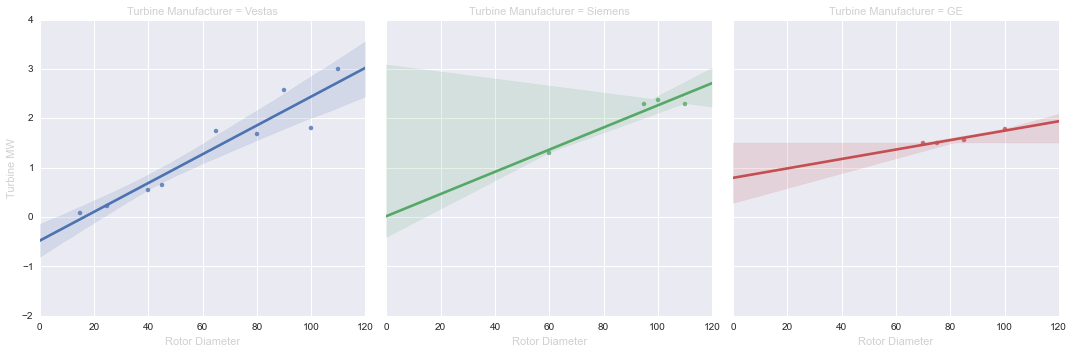

In [13]:
import seaborn as sb
sb.set(rc={'text.color': axis_color, 'axes.labelcolor': axis_color})
rvm = df[['Rotor Diameter', 'Turbine MW', 'Turbine Manufacturer']].dropna()
row_mask = rvm['Turbine Manufacturer'].isin(['Vestas', 'Siemens', 'GE'])
rvm = rvm[row_mask]
rvm['Rotor Diameter'] = rvm['Rotor Diameter'].apply(lambda x: int(5 * round(float(x)/5)))
grouped_rvm = rvm.groupby(['Rotor Diameter', 'Turbine Manufacturer'])
rvm = grouped_rvm.mean().reset_index()
sb.lmplot("Rotor Diameter", "Turbine MW", col="Turbine Manufacturer", 
          hue="Turbine Manufacturer", data=rvm)

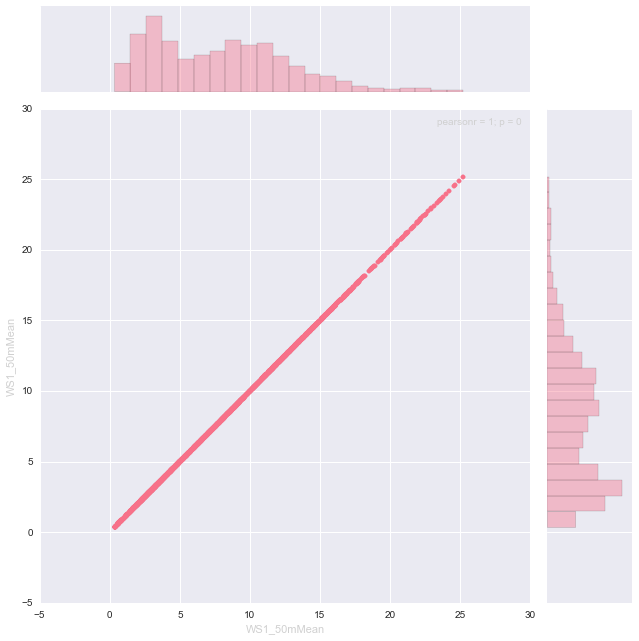

In [14]:
sb.set_palette('husl')
nov_cols = november_2011.columns.tolist()
@interact
def sb_jointplot(x=nov_cols, y=nov_cols):
    sb.jointplot(x, y, data=november_2011, size=9)

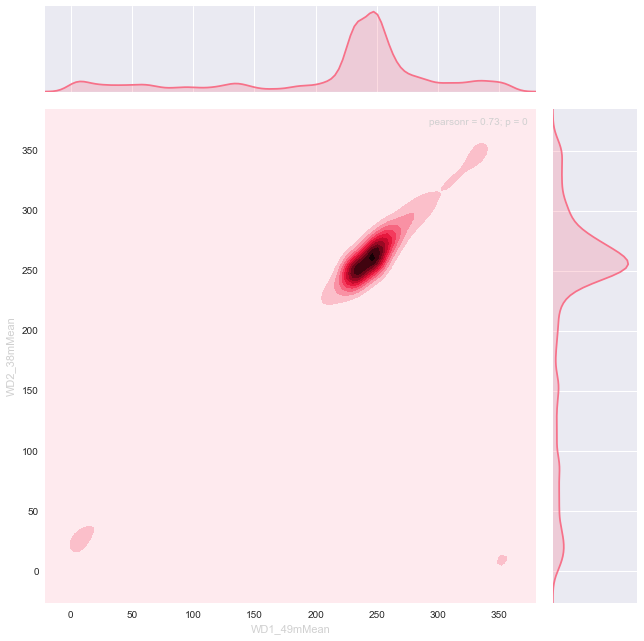

In [15]:
sb.jointplot('WD1_49mMean', 'WD2_38mMean', data=november_2011, size=9, kind='kde')

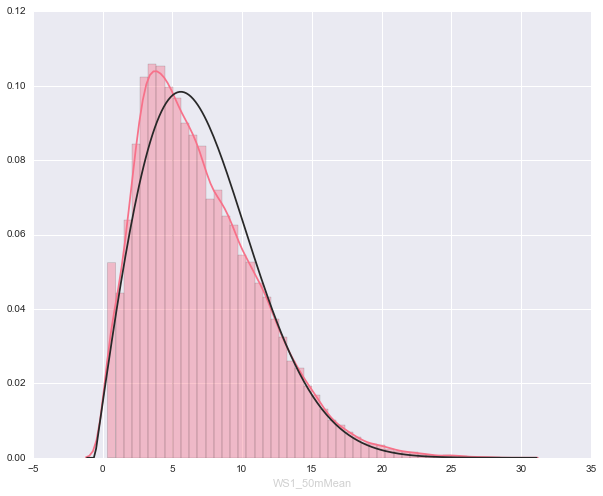

In [16]:
import scipy.stats as stats
dists = ['Rayleigh', 'Weibull', 'Normal']
@interact
def plot_sb_dist(column=ws.columns.tolist(), dist=dists):
    plt.figure(figsize=(10, 8))
    dist_map = {
        'Rayleigh': stats.rayleigh,
        'Weibull': stats.exponweib,
        'Normal': stats.norm,
    }
    sb.distplot(ws[column], fit=dist_map[dist])